## Data 620 Assignment 9
### Lin Li and Tony Mei


1. Choose a corpus of interest.
2. How many total unique words are in the corpus? (Please feel free to define unique words in any interesting, defensible way).
3. Taking the most common words, how many unique words represent half of the total words in the corpus?
4. Identify the 200 highest frequency words in this corpus.
5. Create a graph that shows the relative frequency of these 200 words.
6. Does the observed relative frequency of these words follow Zipf’s law? Explain.
7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

In [1]:
import nltk
from __future__ import division
import nltk, re, pprint
import pandas as pd

In [2]:
# get text from url
from urllib.request import urlopen
url = "https://www.gutenberg.org/files/1519/1519-0.txt"
raw = urlopen(url).read()

# convert from byte type to string
text = raw.decode('UTF-8')
print(type(text))


<class 'str'>


In [3]:
tokens = nltk.word_tokenize(text)
type(tokens)

list

In [4]:
# separate a sentence into words without puctuation
#from nltk.tokenize import RegexpTokenizer
#tokenizer = RegexpTokenizer(r'\w+')
#new_tokens = tokenizer.tokenize(text)

# remove words of 3 letters or less
#data_analysis = nltk.FreqDist(new_tokens)
#filter_words = [(m, n) for m, n in data_analysis.items() if len(m) > 3]


In [5]:
# collaps case distinctions and ignore punctuation
word_list = [w.lower() for w in tokens if w.isalpha()]

# get number of unique words
len(set(word_list))

3295

In [6]:
# get the most common words used
nltk.FreqDist(word_list).most_common(20)

[('the', 770),
 ('i', 725),
 ('and', 711),
 ('you', 572),
 ('a', 560),
 ('to', 517),
 ('of', 493),
 ('in', 384),
 ('is', 329),
 ('that', 318),
 ('not', 306),
 ('my', 283),
 ('it', 270),
 ('for', 247),
 ('with', 246),
 ('her', 224),
 ('don', 219),
 ('me', 218),
 ('he', 211),
 ('will', 208)]

We can see that the stop words, "the", "i", and "not" etc. make up the majority of the frequent words. We will identify the stop words and get the frequency of the non stop words.

In [7]:
# get stop words
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [8]:
# get most frequent words that are not stop words
word_list = [w.lower() for w in word_list]  # handle the case sensitivity
filtered_words = [word for word in word_list if word not in stopwords.words('english')]
freq_list = (nltk.FreqDist(filtered_words).most_common(20))

freq_df = pd.DataFrame(freq_list,columns=['Word','Frequency'])
freq_df

,Word,Frequency
0,benedick,202
1,claudio,200
2,leonato,195
3,beatrice,159
4,pedro,156
5,hero,121
6,man,110
7,good,93
8,project,91
9,love,91


In [9]:
# calculate relative frequency
def rel_freq(x):
    freqs = [(value, x.count(value) / len(x)) for value in set(x)] 
    return freqs
rel_freq_list = rel_freq(filtered_words)

# sort words based on relative frequency
from operator import itemgetter
sorted_list = sorted(rel_freq_list, key=itemgetter(1), reverse=True)
final_list = sorted_list[:200]

<AxesSubplot:xlabel='Word'>

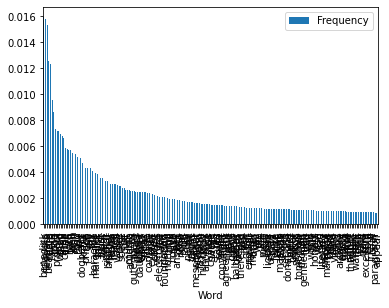

In [10]:
rel_freq_df = pd.DataFrame(final_list,columns=['Word','Frequency'])
rel_freq_df.plot.bar(x='Word', y='Frequency', rot=90)

It's hard to interpret 200 most frequeny words at once, so instead we are looking at the top and bottom 20 most frequent ones.

<AxesSubplot:xlabel='Word'>

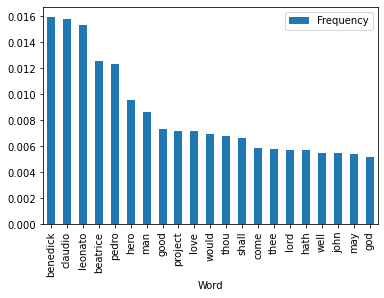

In [11]:
rel_freq_df.iloc[0:21].plot.bar(x='Word', y='Frequency', rot=90)

<AxesSubplot:xlabel='Word'>

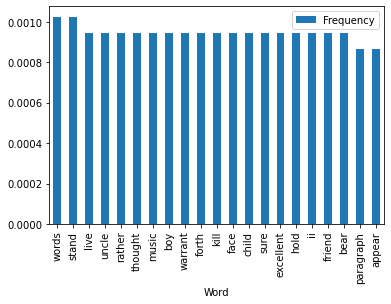

In [12]:
rel_freq_df.iloc[179:201].plot.bar(x='Word', y='Frequency', rot=90)